# 17825번 주사위 윷놀이 - Gold 2

#### 알고리즘 분류 : 구현 , 시뮬레이션 ,백트래킹 , 브루트포스


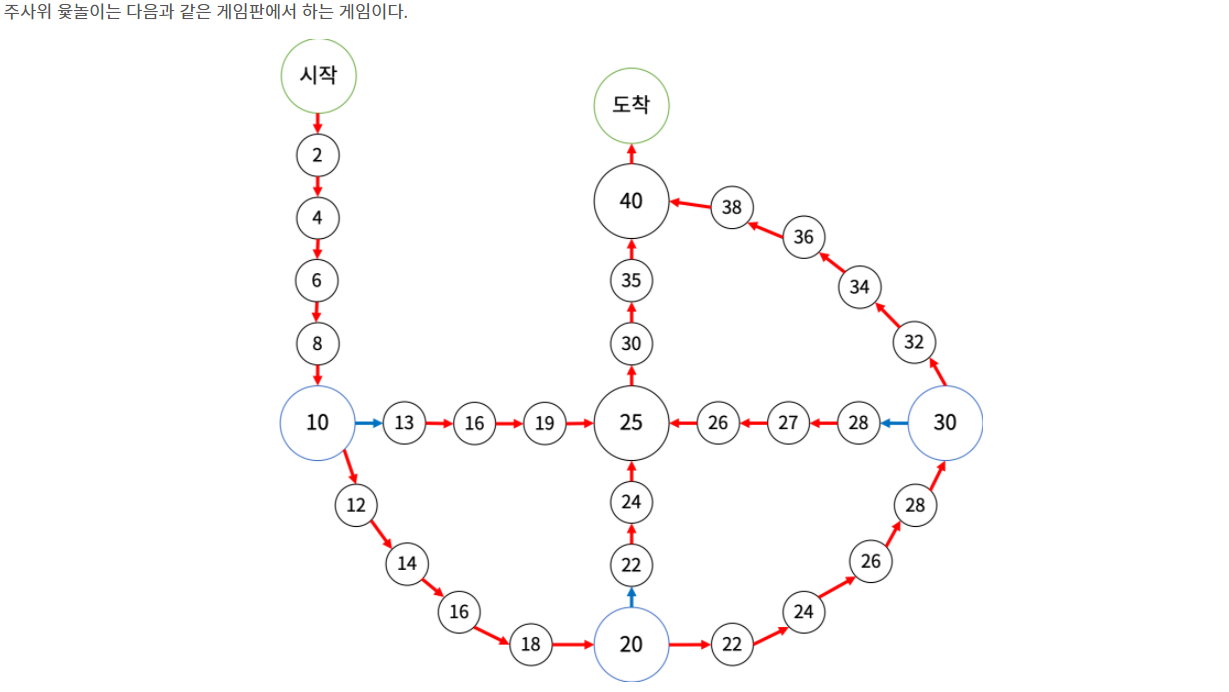
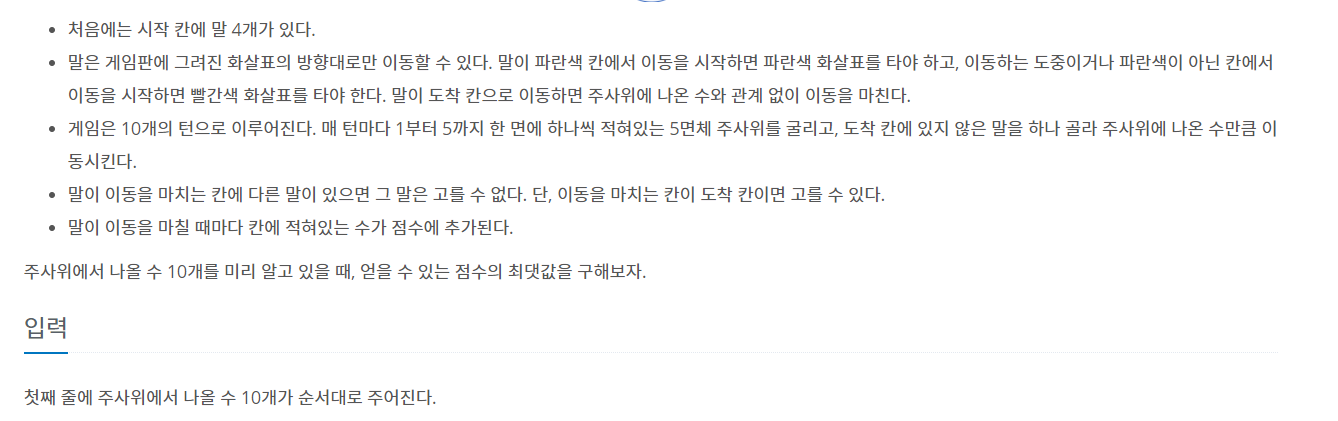

In [ ]:
dice = list(map(int, input().split()))

board = [[i * 2 for i in range(21)] + [-1]]

board.extend(
    [[10, 13, 16, 19, 25, 30, 35, 40, -1],
     [20, 22, 24, 25, 30, 35, 40, -1],
     [30, 28, 27, 26, 25, 30, 35, 40, -1],
     [40,-1]])

horse = [[0, 0], [0, 0], [0, 0], [0, 0]]

answer = 0


def move(horse_idx, count, dice_idx):
    global answer
    global horse
    if dice_idx >= 10:
        if count > answer:
            answer = max(answer, count)
        return
    if horse_idx >3 : return
    if not horse[horse_idx]: return
    run = dice[dice_idx]
    board_idx, pos = horse[horse_idx]


    for i in range(1,run+1):
        if board[board_idx][pos + i] == -1:
            horse[horse_idx] = False
            break
    else:


        if board_idx == 0 and (pos + run) % 5 == 0:
            board_idx = (pos + run) // 5
            pos = 0
            horse[horse_idx] = [board_idx, pos]
        else:
            pos = pos+run
            horse[horse_idx] = [board_idx,pos]

        for i in range(4):
            if i == horse_idx: continue
            if horse[i] and horse[i] == [board_idx,pos]: return

            if horse[i] and board_idx>0 and horse[i][0]> 0  and board[board_idx][pos] == board[horse[i][0]][horse[i][1]]:
                if [board_idx,pos] == [3,0] or horse[i] == [3,0]:
                    continue
                return

        count += board[board_idx][pos]
    current_pos = horse[:]


    move(0, count, dice_idx + 1)
    horse = current_pos[:]
    move(1,count, dice_idx + 1)
    horse = current_pos[:]
    move(2,count, dice_idx + 1)
    horse = current_pos[:]
    move(3,count, dice_idx + 1)
    horse = current_pos[:]
move(0,0,0)
print(answer)